In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6)

In [2]:
def get_omega(L, Theta):
    omega = np.array([1/L for _ in range(L)])
    for _ in range(1000000):
        omega = omega.dot(Theta)
    return omega

In [3]:
class CloseQN:
    def __init__(self):
        self.list_s = []
        self.list_u = []
        self.list_lambdas = []
        self.list_mu = []
        
    def make_calculations(self, L, N, mu, Theta, number_mu):
        # Решение уравнений omega*Theta = omega с условием нормировки
        omega = get_omega(L, Theta)

        # м.о. числа требований в системах
        s = [[0] * L for _ in range(N + 1)]
        # м.о. длительности пребывания требований в системах
        u = [[0] * L for _ in range(N + 1)]

        for Y in range(1, N + 1):
            for i in range(L):
                u[Y][i] = 1 / mu[i] * (s[Y-1][i] + 1)
            for i in range(L):
                summa = 0
                for j in range(L):
                    summa += omega[j] * u[Y][j]
                s[Y][i] = omega[i] * u[Y][i] * Y / summa


        # м.о. длительности ожидания требований в очереди системы
        w = [0] * L
        # м.о. числа требований, ожидающих обслуживание в очереди системы
        b = [0] * L
        # м.о. числа занятых приборов в системах
        h = [0] * L
        # интенсивность входящего потока требований в системы
        lambdas = [0] * L

        for i in range(L):
            w[i] = u[N][i] - (1 / mu[i])
            b[i] = s[N][i] * w[i] / u[N][i]
            h[i] = s[N][i] - b[i]
            lambdas[i] = h[i] * mu[i]
            
        self.list_s.append(s[N])
        self.list_u.append(u[N])
        self.list_lambdas.append(lambdas)
        self.list_mu.append(mu[number_mu - 1])
        
    def draw(self, number_mu, color='b'):
        print(f'Зависимость s от mu_{number_mu}:')
        for i in range(len(self.list_s[0])):
            print(f'Для системы {i + 1}:')
            plt.plot(self.list_mu, [s[i] for s in self.list_s], color)
            plt.xlabel(f'mu_{number_mu}')
            plt.ylabel('s')
            plt.grid()
            plt.show()
        print('#' * 100)

        print(f'Зависимость u от mu_{number_mu}:')
        for i in range(len(self.list_u[0])):
            print(f'Для системы {i + 1}:')
            plt.plot(self.list_mu, [u[i] for u in self.list_u], color)
            plt.xlabel(f'mu_{number_mu}')
            plt.ylabel('u')
            plt.grid()
            plt.show()
        print('#' * 100)
        
        print(f'Зависимость lambdas от mu_{number_mu}:')
        for i in range(len(self.list_lambdas[0])):
            print(f'Для системы {i + 1}:')
            plt.plot(self.list_mu, [l[i] for l in self.list_lambdas], color)
            plt.xlabel(f'mu_{number_mu}')
            plt.ylabel(f'lambda_{i + 1}')
            plt.grid()
            plt.show()
        print('#' * 100)

Зависимость s от mu_2:
Для системы 1:


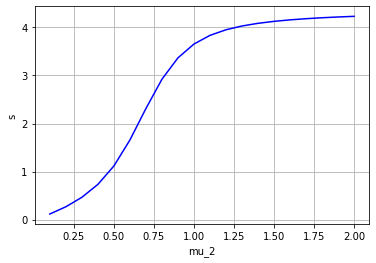

Для системы 2:


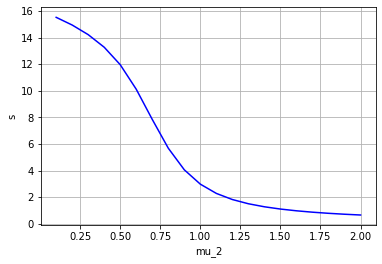

Для системы 3:


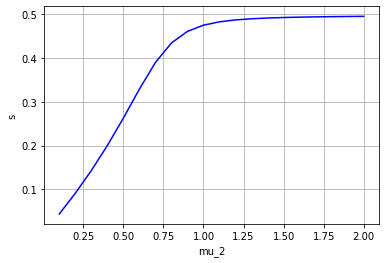

Для системы 4:


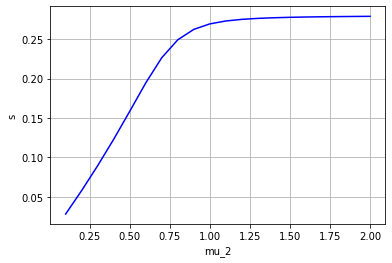

Для системы 5:


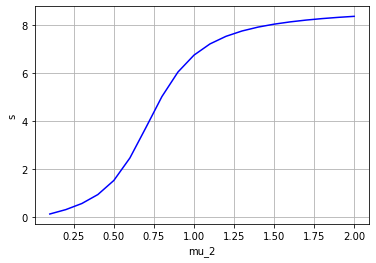

Для системы 6:


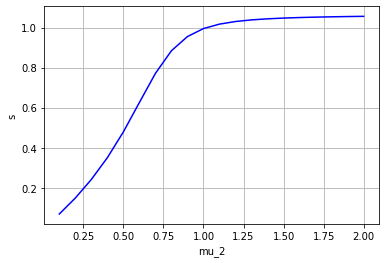

Для системы 7:


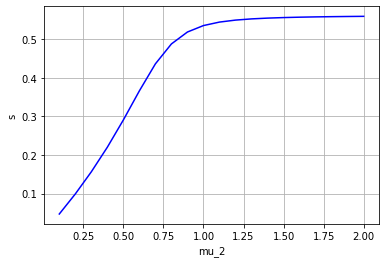

Для системы 8:


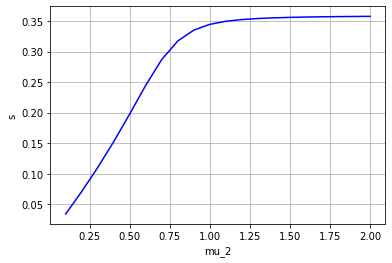

####################################################################################################
Зависимость u от mu_2:
Для системы 1:


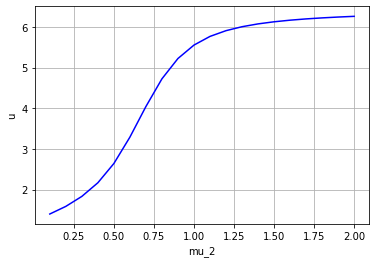

Для системы 2:


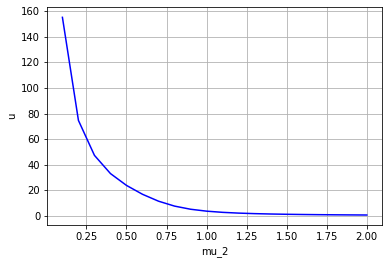

Для системы 3:


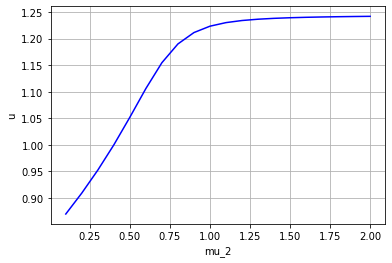

Для системы 4:


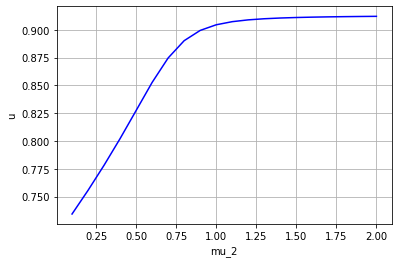

Для системы 5:


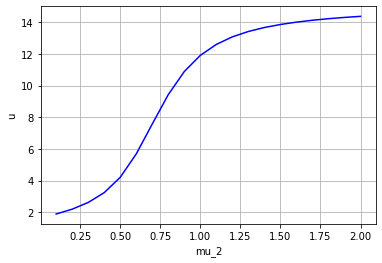

Для системы 6:


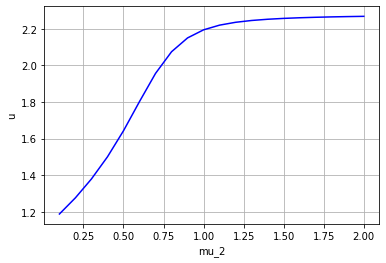

Для системы 7:


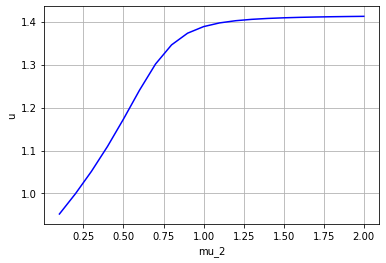

Для системы 8:


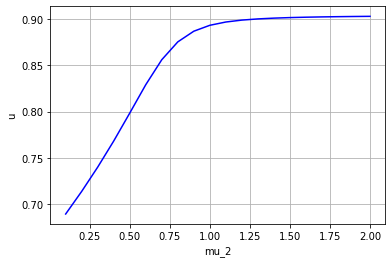

####################################################################################################
Зависимость lambdas от mu_2:
Для системы 1:


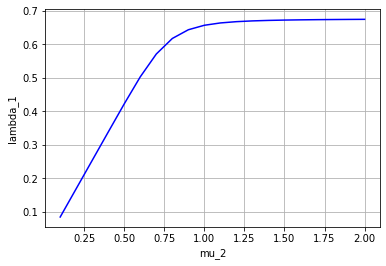

Для системы 2:


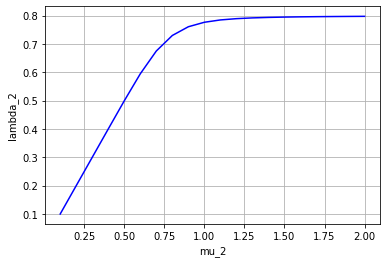

Для системы 3:


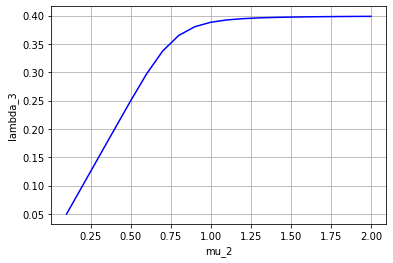

Для системы 4:


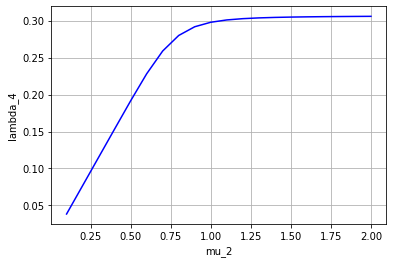

Для системы 5:


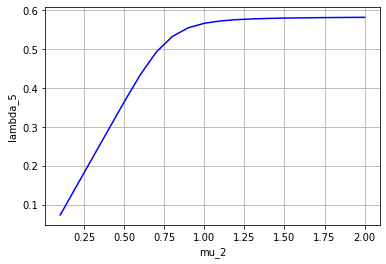

Для системы 6:


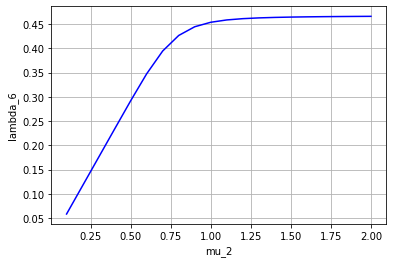

Для системы 7:


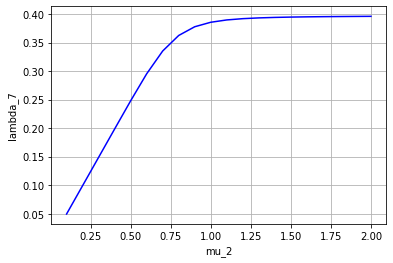

Для системы 8:


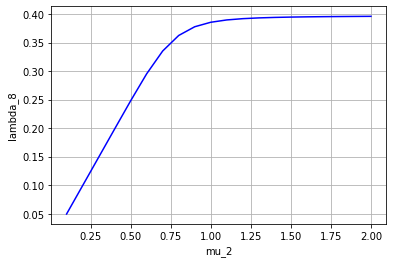

####################################################################################################

------------------------------------------------------------------------------------------------------------------------------------------------------

Зависимость s от mu_7:
Для системы 1:


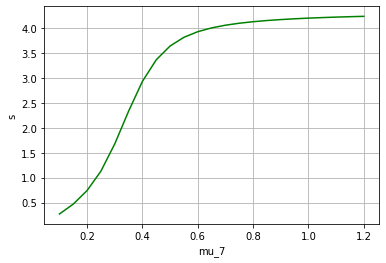

Для системы 2:


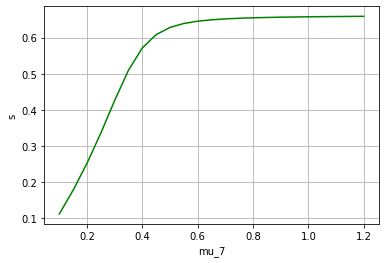

Для системы 3:


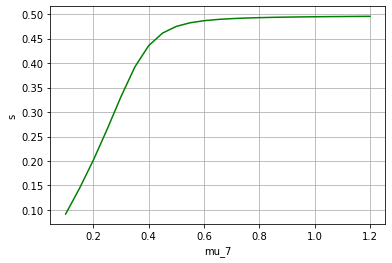

Для системы 4:


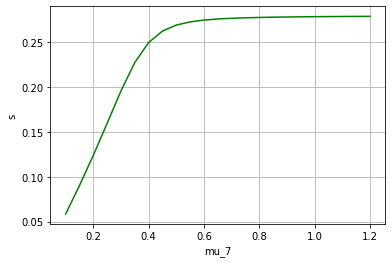

Для системы 5:


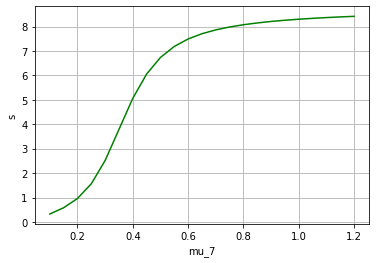

Для системы 6:


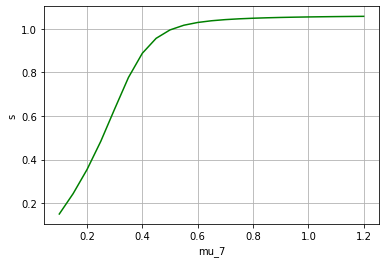

Для системы 7:


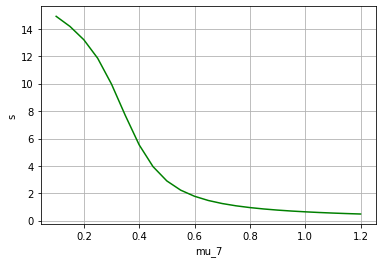

Для системы 8:


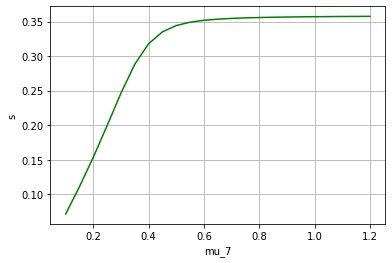

####################################################################################################
Зависимость u от mu_7:
Для системы 1:


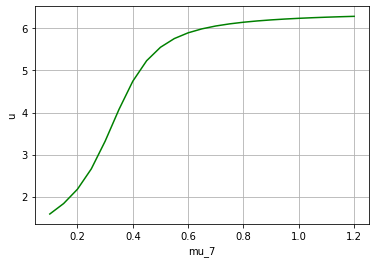

Для системы 2:


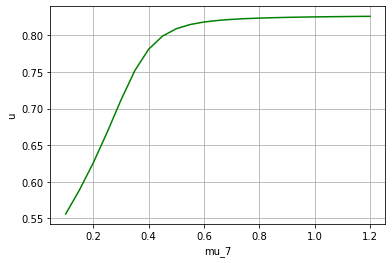

Для системы 3:


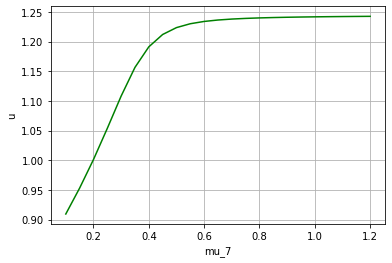

Для системы 4:


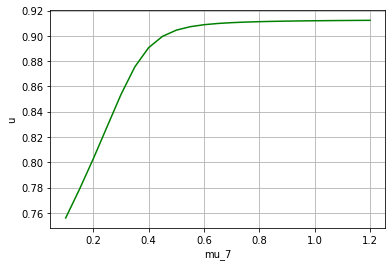

Для системы 5:


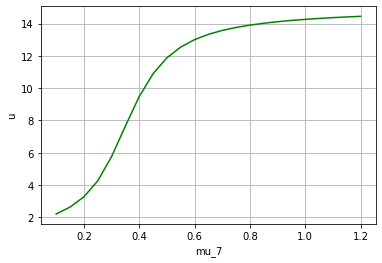

Для системы 6:


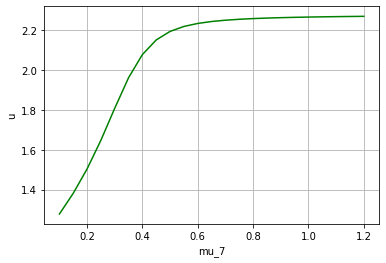

Для системы 7:


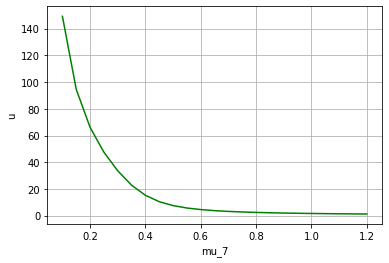

Для системы 8:


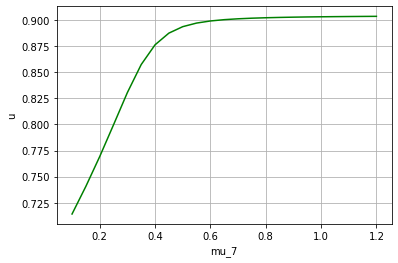

####################################################################################################
Зависимость lambdas от mu_7:
Для системы 1:


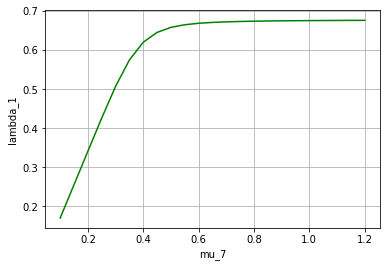

Для системы 2:


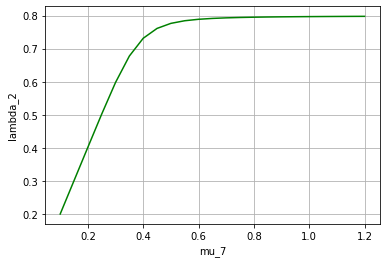

Для системы 3:


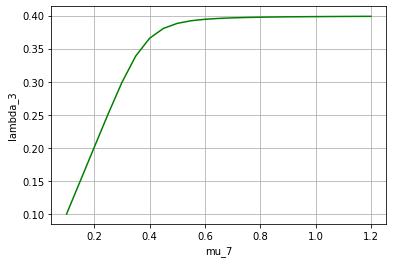

Для системы 4:


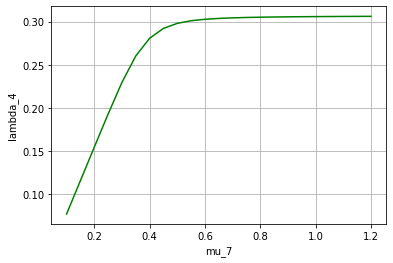

Для системы 5:


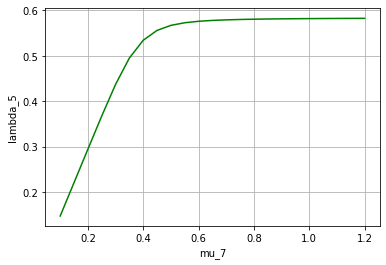

Для системы 6:


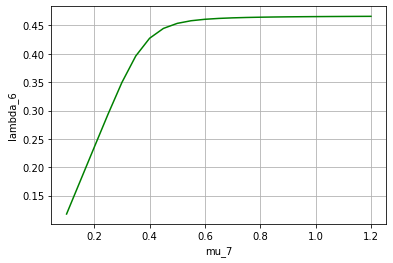

Для системы 7:


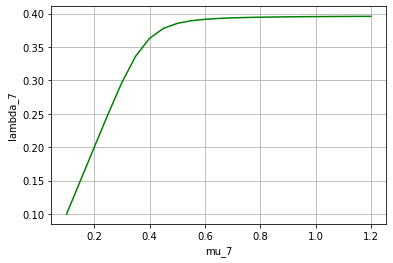

Для системы 8:


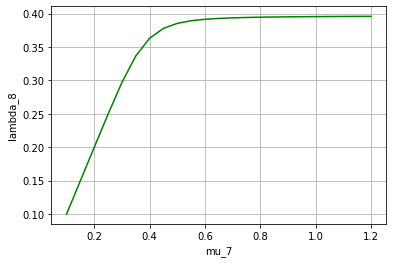

####################################################################################################


In [4]:
# Вариант 2

L = 8
N = 16
mu = [.8, 1., 1.2, 1.4, .6, .9, 1.1, 1.5]
Theta = np.array([
    [.0, 1., .0, .0, .0, .0, .0, .0],
    [.0, .0, .5, .0, .5, .0, .0, .0],
    [.7, .0, .0, .3, .0, .0, .0, .0],
    [.0, .4, .0, .0, .6, .0, .0, .0],
    [.0, .0, .0, .0, .0, .8, .2, .0],
    [.0, .0, .0, .4, .0, .0, .6, .0],
    [.0, .0, .0, .0, .0, .0, .0, 1.],
    [1., .0, .0, .0, .0, .0, .0, .0]
])

# Изменяем mu_2
number_mu = 2
cl = CloseQN()
mu_2 = np.arange(.1, 2.1, .1)
for m in mu_2:
    mu[number_mu - 1] = m
    cl.make_calculations(L, N, mu, Theta, number_mu)
cl.draw(number_mu)

print()
print('-' * 150)
print()

# Изменяем mu_7
number_mu = 7
cl = CloseQN()
mu_7 = np.arange(.1, 1.25, .05)
for m in mu_7:
    mu[number_mu - 1] = m
    cl.make_calculations(L, N, mu, Theta, number_mu)
cl.draw(number_mu, 'g')

